In [0]:

# import the necessary packages

from keras.optimizers import Adam
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os


from google.colab import drive
drive.mount('/content/drive')



Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np

In [0]:

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model
from keras import regularizers
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping


In [0]:
def create_mlp(dim):
# define our MLP network
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu"))
    
    return model

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
import io


path=("/content/drive/My Drive/Colab Notebooks/VARNA.csv")

def load_robot_attributes():
    
    cols = ["Pressure1", "Pressure2", "Pressure3", "B_angle", "Base_Difference_XY","Tip_Difference_XY"]
    
    df = pd.read_csv(path,names=cols)
       
    return df

In [0]:
load_robot_attributes()

,Pressure1,Pressure2,Pressure3,B_angle,Base_Difference_XY,Tip_Difference_XY
0,0.324545,0.021818,0.034389,-1.791057,20,-445
1,0.321818,0.071818,0.034389,-1.802898,20,-446
2,0.334545,0.519091,0.019910,33.055985,-141,-401
3,0.377273,0.035455,0.373529,-21.215635,112,-421
4,1.131818,0.425455,0.033484,8.345637,-19,-444
5,1.129091,0.477273,0.028959,9.778632,-26,-444
6,1.132727,0.528182,0.020814,11.904586,-36,-441
7,1.136364,0.576364,0.029864,13.642215,-42,-438
8,1.118182,0.630000,0.018100,15.758292,-52,-437
9,1.132727,0.683636,0.022624,16.905555,-58,-434


In [0]:
# i m giving in Bending sensor inputs
def process_robot_attributes(df, train, test):
    
    continuous = ["B_angle", "Base_Difference_XY","Tip_Difference_XY"]
    
    cs= MinMaxScaler()
    
    trainContinuous = cs.fit_transform(train[continuous])
    testContinuous = cs.transform(test[continuous])
    
    return(trainContinuous,testContinuous)

In [0]:
# i m giving in Bending sensor inputs
def process_robot_label_attributes(df, train, test):
    
    continuous = ["Pressure1", "Pressure2", "Pressure3"]
    
    trainContinuous = np.array(train[continuous])
    testContinuous = np.array(test[continuous])
    
    return(trainContinuous,testContinuous)

In [0]:
print("[INFO] loading robot data attributes...")
df = load_robot_attributes()

[INFO] loading robot data attributes...


In [0]:
BENDING_ANGLE=df["B_angle"]
BASE=df["Base_Difference_XY"]
TIP=df["Tip_Difference_XY"]
PRES_1=df["Pressure1"]
PRES_2=df["Pressure2"]
PRES_3=df["Pressure3"]

In [0]:
COUNT=[]
for i in range(0,1178):
     COUNT.append(i)
     

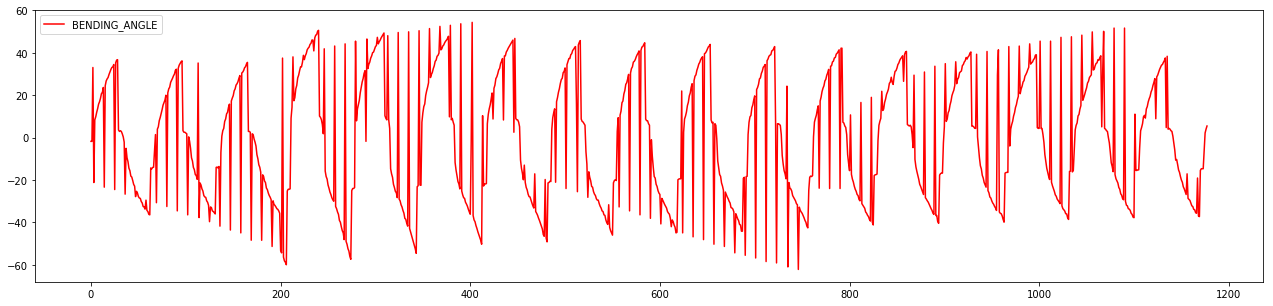

In [0]:
import matplotlib.pyplot as plt
import pylab 

pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,BENDING_ANGLE, 'R', label ='BENDING_ANGLE')

pylab.legend(loc='upper left')
pylab.show()


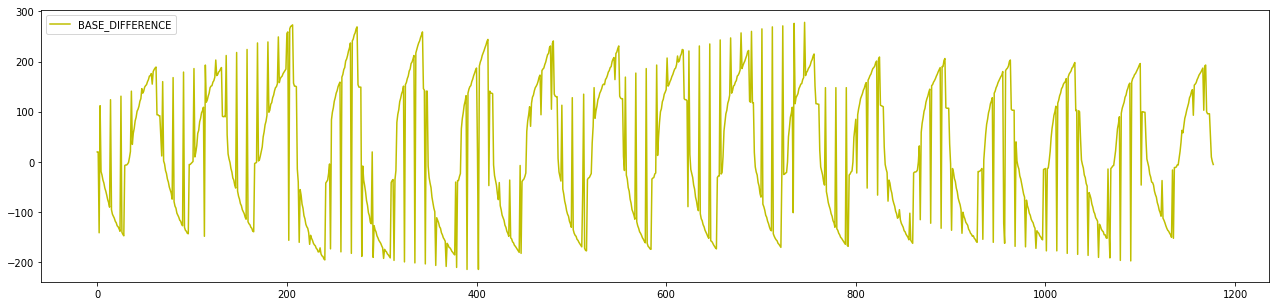

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,BASE, 'Y', label ='BASE_DIFFERENCE')

pylab.legend(loc='upper left')
pylab.show()


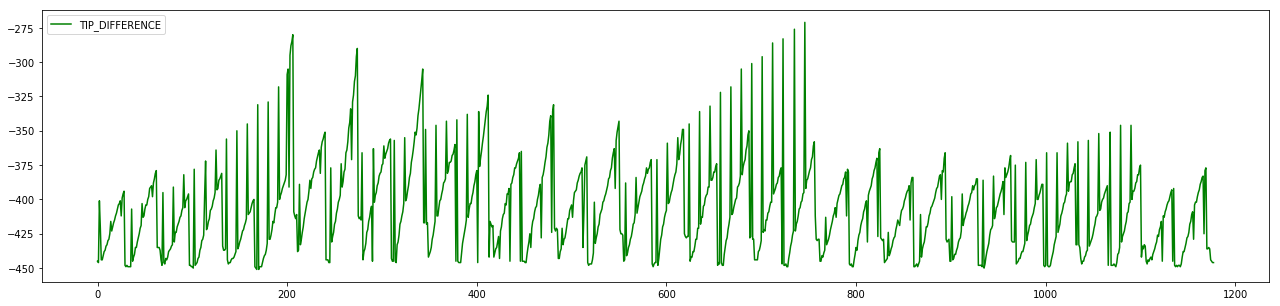

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,TIP, 'G', label ='TIP_DIFFERENCE')

pylab.legend(loc='upper left')
pylab.show()


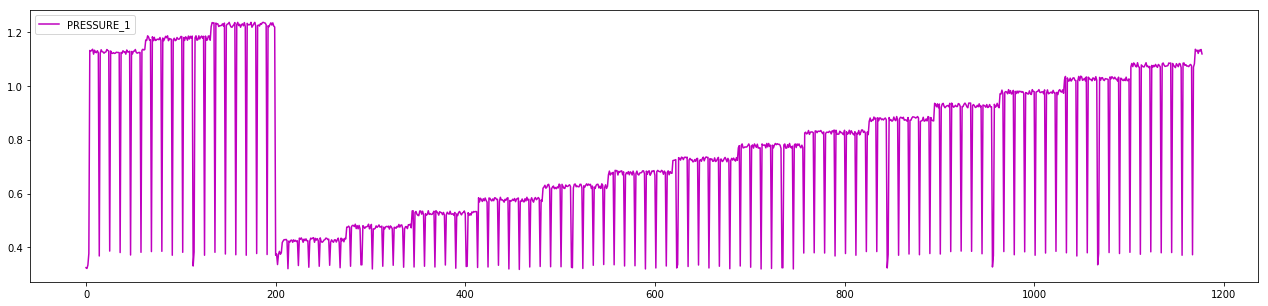

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,PRES_1, 'M', label ='PRESSURE_1')

pylab.legend(loc='upper left')
pylab.show()


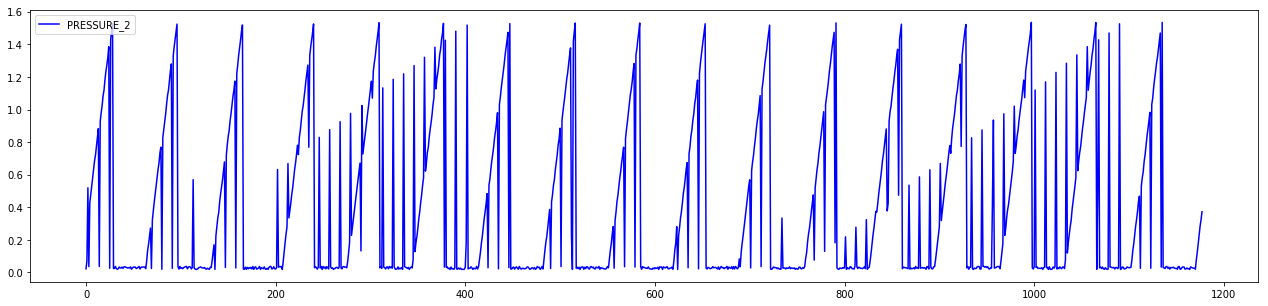

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,PRES_2, 'B', label ='PRESSURE_2')

pylab.legend(loc='upper left')
pylab.show()


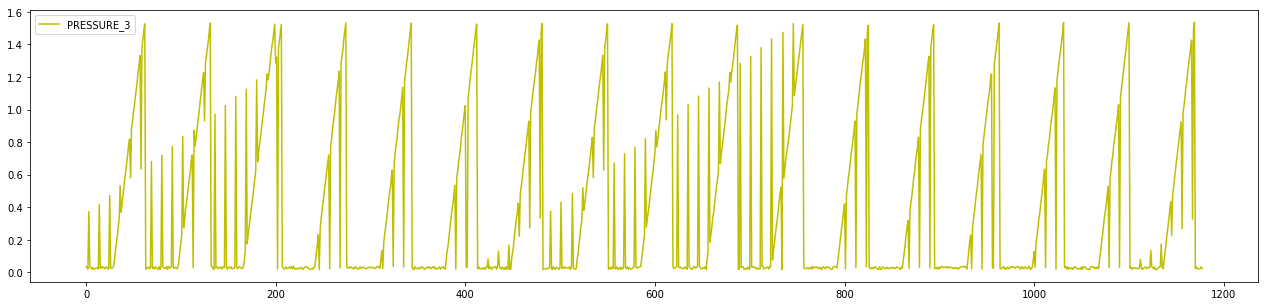

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(COUNT,PRES_3, 'Y', label ='PRESSURE_3')

pylab.legend(loc='upper left')
pylab.show()


In [0]:
from sklearn.utils import shuffle
df = shuffle(df)

W0828 16:10:32.578817 140414430148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 16:10:32.594607 140414430148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 16:10:32.598600 140414430148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 16:10:32.638596 140414430148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 16:10:32.745651 140414430148480 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
Train on 1119 samples, validate on 59 samples
Epoch 1/300
1119/1119 [==============================] - 0s 183us/step - loss: 0.6336 - acc: 0.7105 - val_loss: 0.5915 - val_acc: 0.5593
Epoch 2/300
1119/1119 [==============================] - 0s 25us/step - loss: 0.5813 - acc: 0.6926 - val_loss: 0.5443 - val_acc: 0.5593
Epoch 3/300
1119/1119 [==============================] - 0s 23us/step - loss: 0.5320 - acc:

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.212827). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107120). Check your callbacks.
  % delta_t_median)


1119/1119 [==============================] - 0s 30us/step - loss: 0.1419 - acc: 0.9455 - val_loss: 0.1167 - val_acc: 0.9322
Epoch 184/300
1119/1119 [==============================] - 0s 25us/step - loss: 0.1419 - acc: 0.9455 - val_loss: 0.1170 - val_acc: 0.9322
Epoch 185/300
1119/1119 [==============================] - 0s 27us/step - loss: 0.1418 - acc: 0.9473 - val_loss: 0.1161 - val_acc: 0.9322
Epoch 186/300
1119/1119 [==============================] - 0s 28us/step - loss: 0.1417 - acc: 0.9473 - val_loss: 0.1170 - val_acc: 0.9322
Epoch 187/300
1119/1119 [==============================] - 0s 25us/step - loss: 0.1420 - acc: 0.9464 - val_loss: 0.1162 - val_acc: 0.9322
Epoch 188/300
1119/1119 [==============================] - 0s 34us/step - loss: 0.1417 - acc: 0.9446 - val_loss: 0.1165 - val_acc: 0.9322
Epoch 189/300
1119/1119 [==============================] - 0s 28us/step - loss: 0.1418 - acc: 0.9455 - val_loss: 0.1168 - val_acc: 0.9322
Epoch 190/300
1119/1119 [=======================

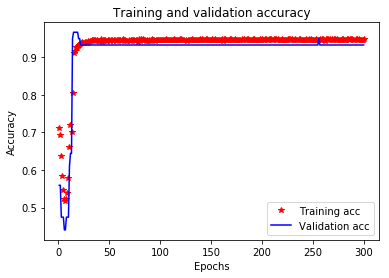

59/59 [==============================] - 0s 141us/step


In [0]:
import matplotlib.pyplot as plt

scores = []
results= []


for x in range(0, 1):


  split = train_test_split(df, test_size=0.05)
  (trainAttrX, testAttrX) = split
  (Ytrain, Ytest)= process_robot_label_attributes(df, trainAttrX, testAttrX)
  (train_final_AttrX, test_final_AttrX) = process_robot_attributes(df,trainAttrX, testAttrX)
  mlp = create_mlp(train_final_AttrX.shape[1])
  x = (mlp.output)
  out1 = Dense(3,  activation='linear')(x)
  model = Model(inputs=[mlp.input], outputs=[out1])
  opt = Adam(lr=1e-3, decay=1e-3 / 200)
  model.compile(loss='mean_absolute_error', optimizer = opt, metrics=['accuracy'])
  model.summary()
  history=model.fit([train_final_AttrX], [Ytrain],validation_data=([test_final_AttrX],[Ytest]),epochs=300, batch_size=50,verbose=1)

  history_dict = history.history
  acc1 = history_dict['acc']
  val_acc1 = history_dict['val_acc']
  epochs = range(1, len(acc1) + 1)

  plt.plot(epochs, acc1, 'r*', label='Training acc')
  plt.plot(epochs, val_acc1, 'b', label='Validation acc')

  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()
  
  results=model.evaluate([test_final_AttrX],[Ytest])
  scores.append(results[1])

In [0]:
scores

[0.9322033827587709]

In [0]:
print(np.mean(scores))

0.9322033827587709


In [0]:
y_bending_angle=testAttrX["B_angle"]
y_base_difference=testAttrX["Base_Difference_XY"]
y_tip_difference=testAttrX["Tip_Difference_XY"]

In [0]:
print("Predicted first sensor Output")
preds = model.predict([test_final_AttrX])

print("Predicted Output values" ,preds[0], "\t"," Actual Output values",Ytest[0])
print("Predicted Output values" ,preds[1], "\t","Actual Output values",Ytest[1])
print("Predicted Output values" ,preds[2], "\t","Actual Output values",Ytest[2])
print("Predicted Output values" ,preds[3], "\t","Actual Output values",Ytest[3])
print("Predicted Output values" ,preds[4], "\t","Actual Output values",Ytest[4])
print("Predicted Output values" ,preds[5], "\t","Actual Output values",Ytest[5])
print("Predicted Output values" ,preds[6], "\t","Actual Output values",Ytest[6])
print("Predicted Output values" ,preds[7], "\t","Actual Output values",Ytest[7])
print("Predicted Output values" ,preds[8], "\t","Actual Output values",Ytest[8])
print("Predicted Output values" ,preds[9], "\t","Actual Output values",Ytest[9])

Predicted first sensor Output
Predicted Output values [0.91379875 0.04215816 0.34323686] 	  Actual Output values [0.81909091 0.02636364 0.37624434]
Predicted Output values [0.67504084 1.2643603  0.02971777] 	 Actual Output values [0.57727273 1.17909091 0.03438914]
Predicted Output values [0.95505756 0.18998033 0.08476669] 	 Actual Output values [0.97090909 0.38545454 0.03167421]
Predicted Output values [0.7171441  0.01863365 1.0230291 ] 	 Actual Output values [1.08       0.03423423 1.37714932]
Predicted Output values [0.4751194  0.04120668 1.7081952 ] 	 Actual Output values [0.43181818 0.03545454 1.37352941]
Predicted Output values [0.8230569  1.0238771  0.02428192] 	 Actual Output values [0.87454546 1.01909091 0.02986425]
Predicted Output values [0.96157724 0.11354059 0.10162272] 	 Actual Output values [0.93272727 0.28090909 0.02986425]
Predicted Output values [0.76610506 0.02039302 0.8660799 ] 	 Actual Output values [0.68272727 0.01818182 0.86900453]
Predicted Output values [0.786343

In [0]:
preds

array([[0.91379875, 0.04215816, 0.34323686],
       [0.67504084, 1.2643603 , 0.02971777],
       [0.95505756, 0.18998033, 0.08476669],
       [0.7171441 , 0.01863365, 1.0230291 ],
       [0.4751194 , 0.04120668, 1.7081952 ],
       [0.8230569 , 1.0238771 , 0.02428192],
       [0.96157724, 0.11354059, 0.10162272],
       [0.76610506, 0.02039302, 0.8660799 ],
       [0.78634363, 1.1986835 , 0.03311108],
       [0.8747962 , 0.72514254, 0.03461346],
       [0.9410124 , 0.2266549 , 0.06598028],
       [0.91280997, 0.48124212, 0.05870692],
       [0.8848779 , 0.02022113, 0.5348671 ],
       [0.78250563, 1.1896744 , 0.03933086],
       [0.90985984, 0.04118286, 0.36632967],
       [0.7674598 , 0.02425759, 0.8532848 ],
       [0.8628094 , 0.7875382 , 0.03275651],
       [0.95926267, 0.08426382, 0.10687353],
       [0.9541699 , 0.13149816, 0.08637967],
       [0.91447943, 0.04307958, 0.3399996 ],
       [0.7433519 , 0.01980202, 0.9427507 ],
       [0.9370225 , 0.3207714 , 0.06305895],
       [0.

In [0]:
Predicted_Pressure1=[]
Actual_Pressure1=[]

Predicted_Pressure2=[]
Actual_Pressure2=[]

Predicted_Pressure3=[]
Actual_Pressure3=[]
count = []

for i in range(0,59):
  
     count.append(i) 
     Predicted_Pressure1.append(preds[i][0]) 
     Actual_Pressure1.append(Ytest[i][0])
      
     Predicted_Pressure2.append(preds[i][1]) 
     Actual_Pressure2.append(Ytest[i][1])
      
     Predicted_Pressure3.append(preds[i][2]) 
     Actual_Pressure3.append(Ytest[i][2])


In [0]:
from sklearn.metrics import mean_absolute_error

score1 = mean_absolute_error(Predicted_Pressure1,Actual_Pressure1) # calculate the mean absolute error of the Bending angles
print(score1)
score2 = mean_absolute_error(Predicted_Pressure2,Actual_Pressure2) # calculate the mean absolute error of the base difference
print(score2)
score3 = mean_absolute_error(Predicted_Pressure3,Actual_Pressure3) # calculate the mean absolute error of the TIP difference
print(score3)

0.1644141956957646
0.09565241549584298
0.0883740440549729


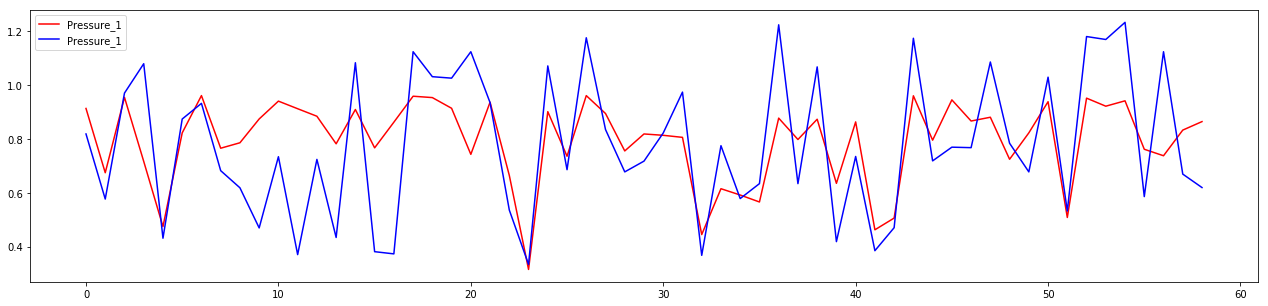

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_Pressure1, 'R', label ='Pressure_1')
pylab.plot(count,Actual_Pressure1, 'B', label ='Pressure_1')

pylab.legend(loc='upper left')
pylab.show()


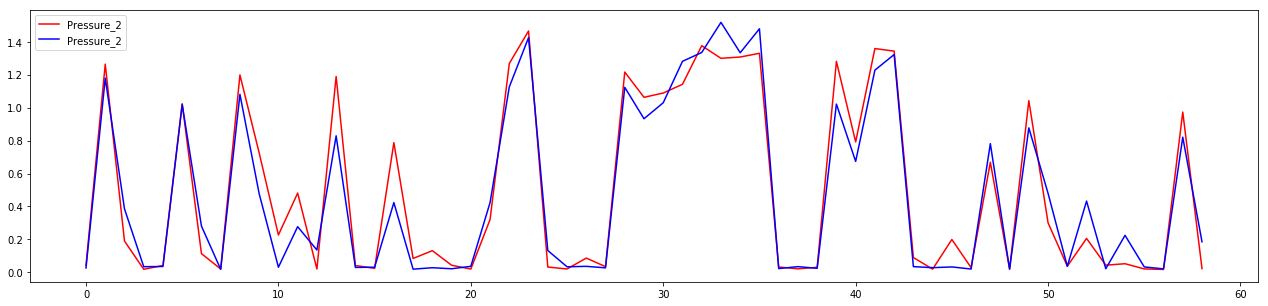

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_Pressure2, 'R', label ='Pressure_2')
pylab.plot(count,Actual_Pressure2, 'B', label ='Pressure_2')

pylab.legend(loc='upper left')
pylab.show()


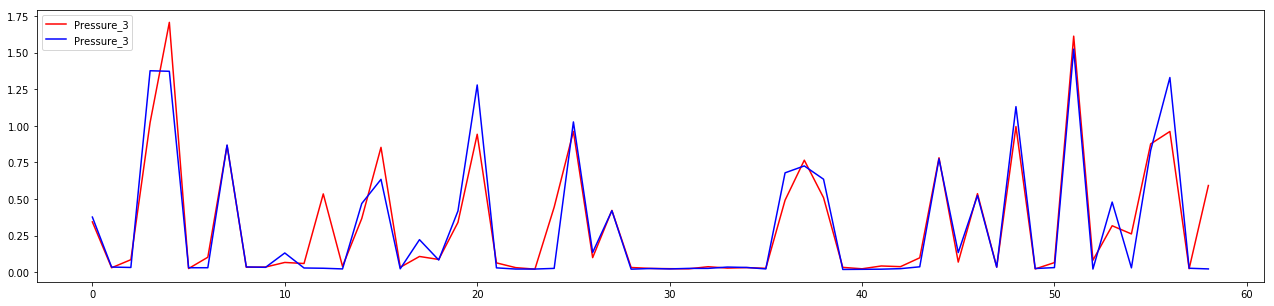

In [0]:
pylab.figure(figsize=(22,5))

# red dashes, blue squares and green triangles
pylab.plot(count,Predicted_Pressure3, 'R', label ='Pressure_3')
pylab.plot(count,Actual_Pressure3, 'B', label ='Pressure_3')

pylab.legend(loc='upper left')
pylab.show()


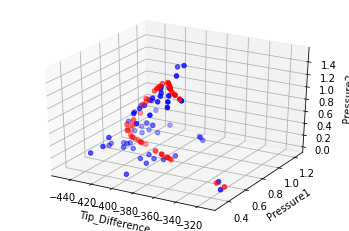

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_tip_difference,Actual_Pressure1, Actual_Pressure2, c='B', marker='o')
ax.scatter(y_tip_difference,Predicted_Pressure1, Predicted_Pressure2, c='R', marker='o')

ax.set_xlabel('Tip_Difference')
ax.set_ylabel('Pressure1')
ax.set_zlabel('Pressure2')

plt.show()